# neurocatcher example notebook

## dataTrain example

### import necessary modules

In [4]:
from showit import image
import matplotlib.pyplot as plot
import numpy as np
from fakearray import calcium_imaging
from showit import image
%matplotlib inline

from neurocatcher import dataTrain

### get data and truth from fakearray and format for neurocatcher

In [15]:
data,series,truth=calcium_imaging(shape=(240,240), n=75, t=10, noise=0.0, withparams=True)

data=data*255/data.max()
data=np.transpose(data,(1,2,0))

### run dataTrain

In [20]:

batchData,batchTruth=dataTrain([data],[truth],10,120,120-36,0,255)

### plot images

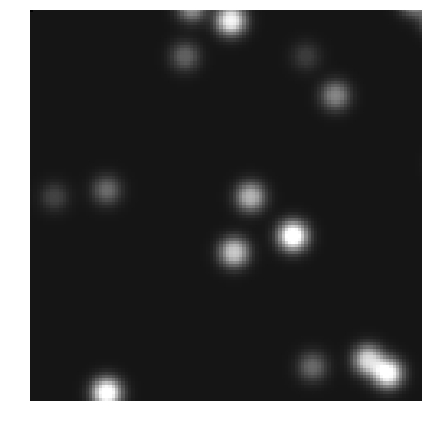

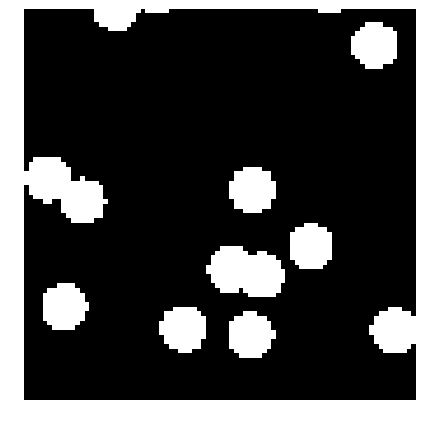

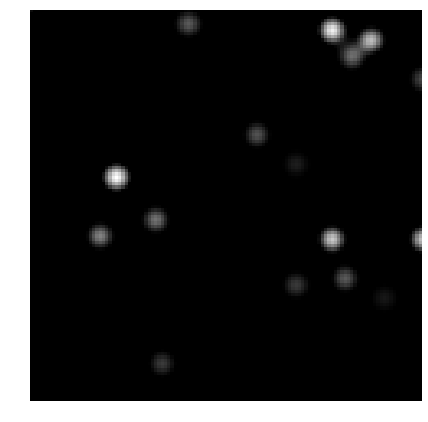

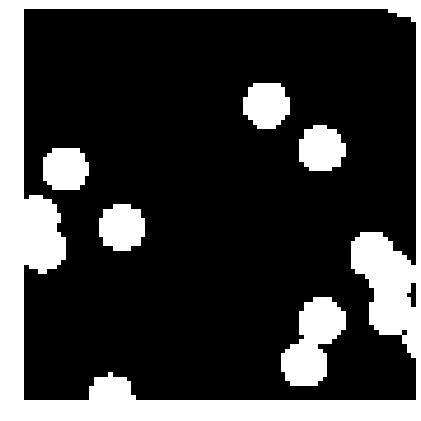

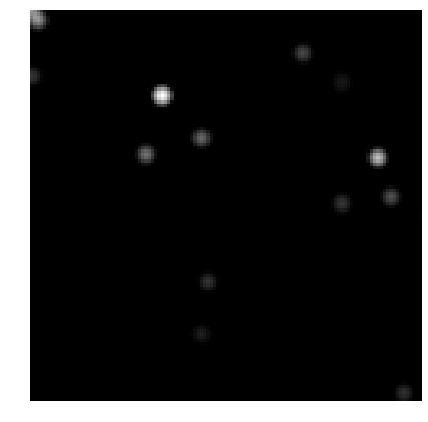

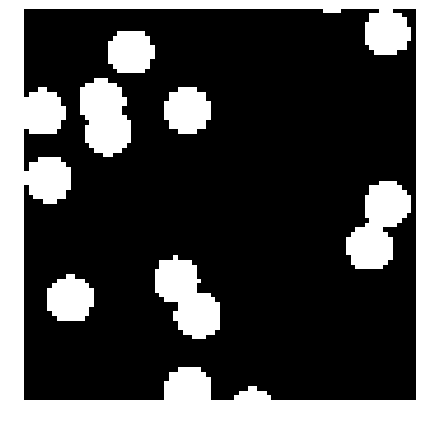

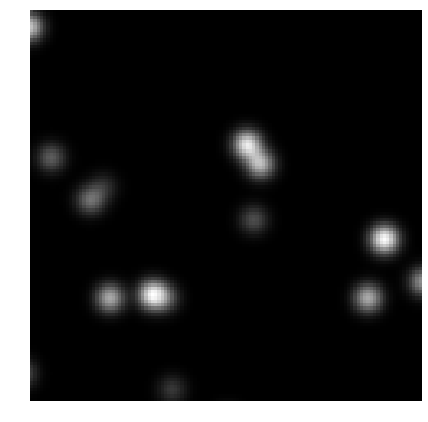

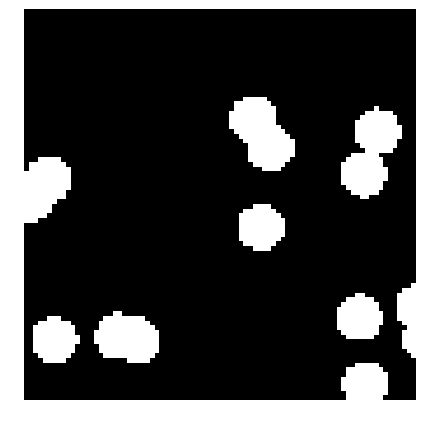

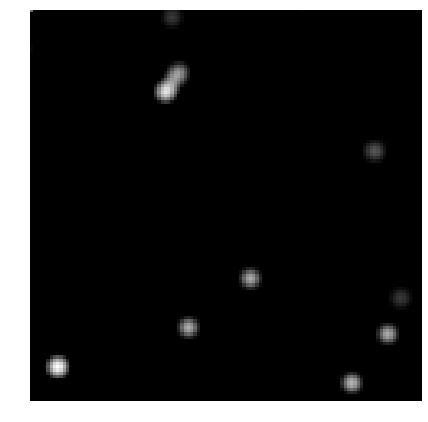

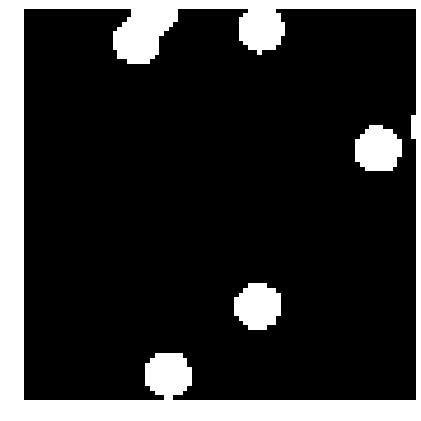

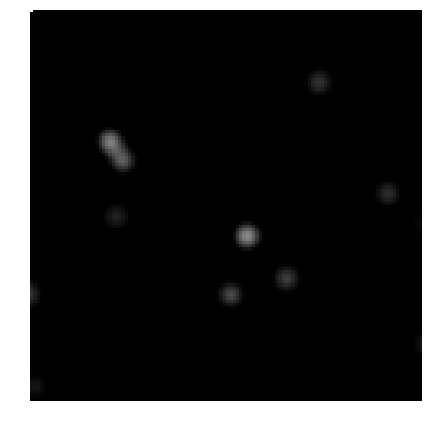

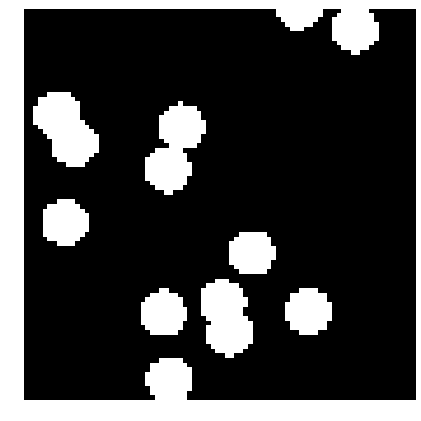

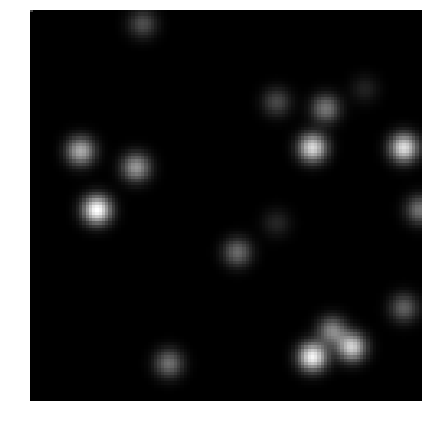

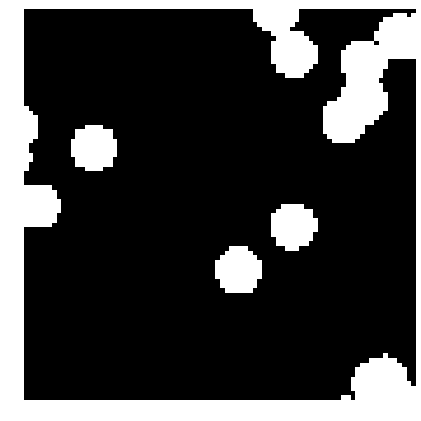

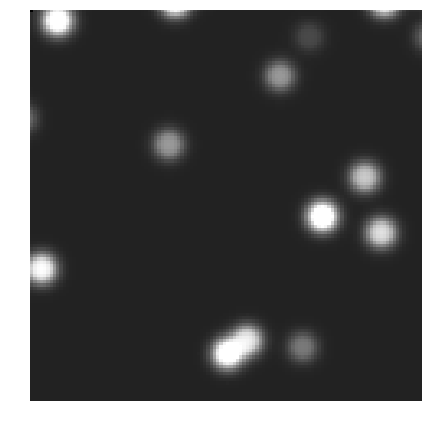

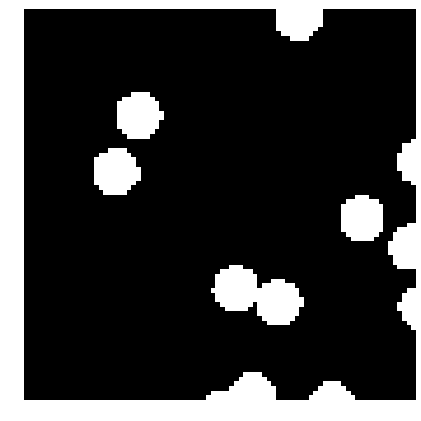

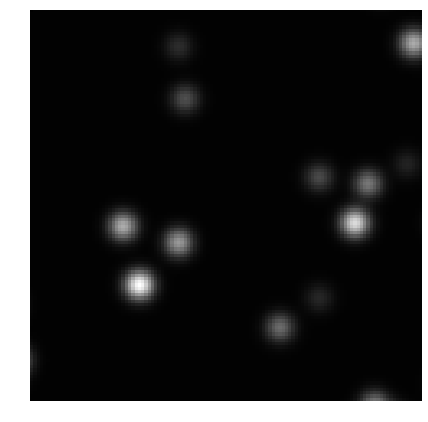

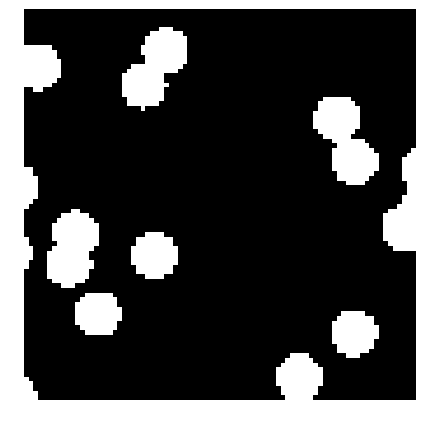

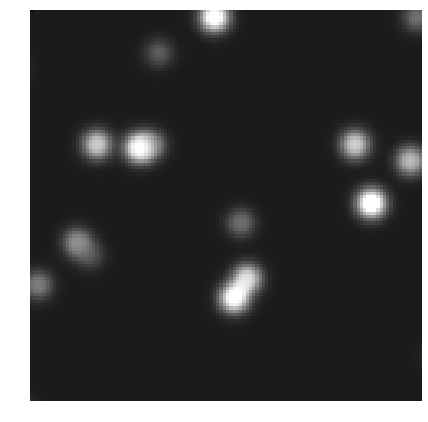

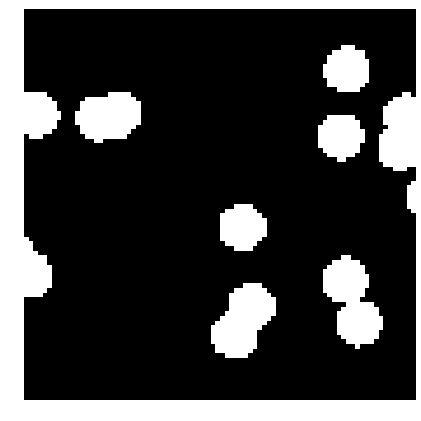

In [21]:
for i,pic in enumerate(batchData):
    image(np.mean(pic,axis=2))
    image(batchTruth[i,:,:,0])
